Gold Data:
                                  Open         High          Low        Close  \
Date                                                                            
2024-12-11 00:00:00-05:00  2701.800049  2733.800049  2693.100098  2733.800049   
2024-12-12 00:00:00-05:00  2725.100098  2725.100098  2677.399902  2687.500000   
2024-12-13 00:00:00-05:00  2688.199951  2689.300049  2647.899902  2656.000000   
2024-12-16 00:00:00-05:00  2658.300049  2663.300049  2651.000000  2651.399902   
2024-12-17 00:00:00-05:00  2651.800049  2652.300049  2632.500000  2644.399902   

                           Volume  Dividends  Stock Splits  
Date                                                        
2024-12-11 00:00:00-05:00    3387        0.0           0.0  
2024-12-12 00:00:00-05:00    2365        0.0           0.0  
2024-12-13 00:00:00-05:00    1125        0.0           0.0  
2024-12-16 00:00:00-05:00     877        0.0           0.0  
2024-12-17 00:00:00-05:00     705        0.0           

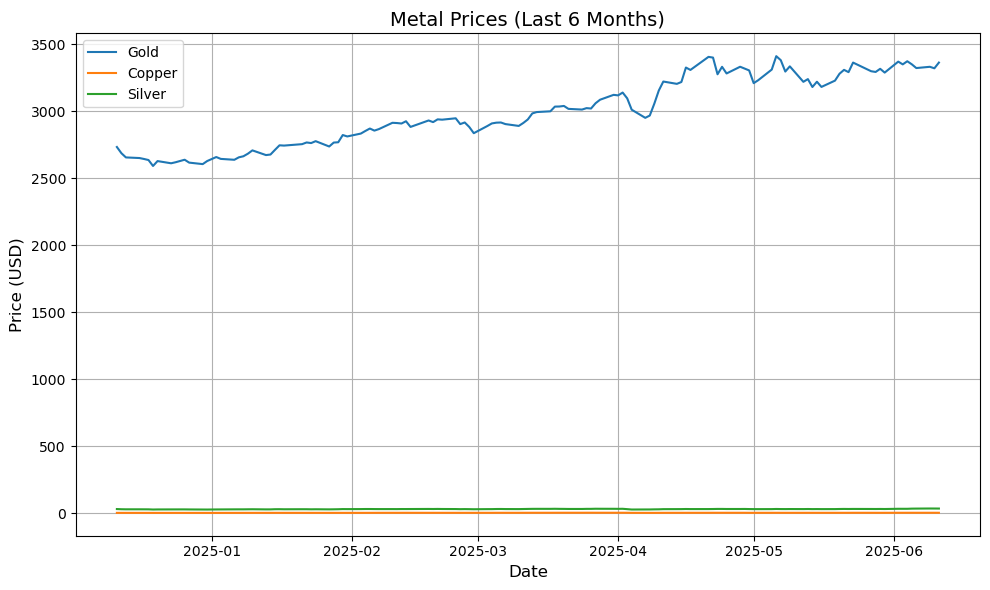


Variance of Metal Prices (Last 6 Months):
Gold      63318.762388
Copper        0.094325
Silver        2.670747
dtype: float64

Correlation Matrix of Metal Prices (Last 6 Months):
            Gold    Copper    Silver
Gold    1.000000  0.696363  0.681414
Copper  0.696363  1.000000  0.865321
Silver  0.681414  0.865321  1.000000


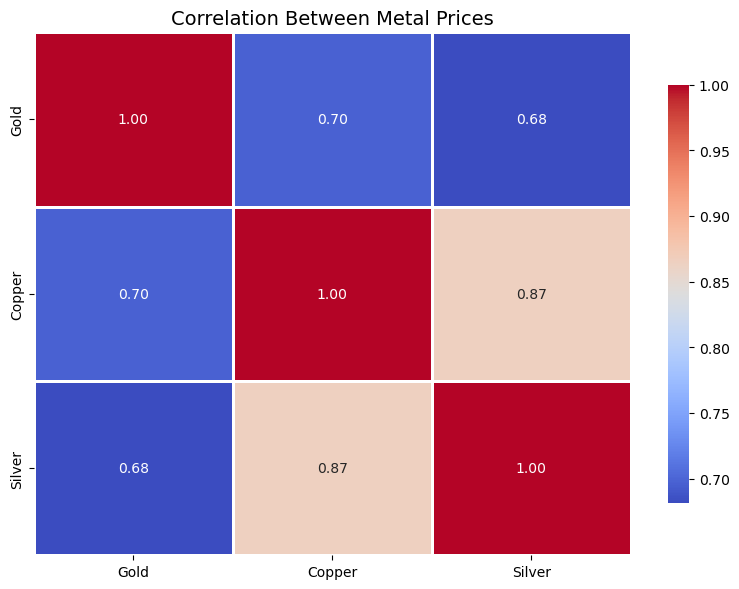

In [20]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the tickers for metals
metals = {
    "Gold": "GC=F",        # Gold futures
    "Copper": "HG=F",      # Copper futures
    "Silver": "SI=F"       # Silver futures
}

# Fetch historical data for the last 6 months
metal_data = {}
for metal, ticker in metals.items():
    metal_data[metal] = yf.Ticker(ticker).history(period="6mo")  # Last 6 months

# Display the first few rows for Gold data (as an example)
print("Gold Data:")
print(metal_data["Gold"].head())

# Optionally, merge data into a single DataFrame for easy comparison
merged_data = pd.DataFrame({metal: data['Close'] for metal, data in metal_data.items()})
merged_data.dropna(inplace=True)  # Drop any missing values

# Display merged data
print("\nMerged Data (Gold, Copper, Silver):")
print(merged_data.head())

# Plot the closing prices of each metal
plt.figure(figsize=(10, 6))
for metal in merged_data.columns:
    plt.plot(merged_data.index, merged_data[metal], label=metal)

plt.title('Metal Prices (Last 6 Months)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the variance for each metal
variance = merged_data.var()
print("\nVariance of Metal Prices (Last 6 Months):")
print(variance)

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()
print("\nCorrelation Matrix of Metal Prices (Last 6 Months):")
print(correlation_matrix)

# Plot the correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Correlation Between Metal Prices', fontsize=14)
plt.tight_layout()
plt.show()
